# HOUSE PRICE PREDICTION

 Dataset: Boston Housing or Kaggle house prices dataset

Concepts: Linear Regression, feature scaling, evaluation metrics (RMSE, MAE)

Learning: Regression basics & feature importance

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [10]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/Machine-Learning-Projects/datasets/House Price Prediction Dataset.csv')
df.shape

(2000, 10)

# Data Preprocessing

In [11]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [12]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


## Handle missing values

### Subtask:
Check for and address any missing values in the dataset.


**Reasoning**:
Check for missing values in the dataframe.



In [13]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

## Handle duplicates

### Subtask:
Identify and remove duplicate rows.


**Reasoning**:
Check for and count duplicate rows in the DataFrame.



In [14]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Handle outliers

### Subtask:
Detect and manage outliers in numerical features.


**Reasoning**:
Identify the numerical columns and visualize their distributions to detect outliers.



Numerical columns: ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']


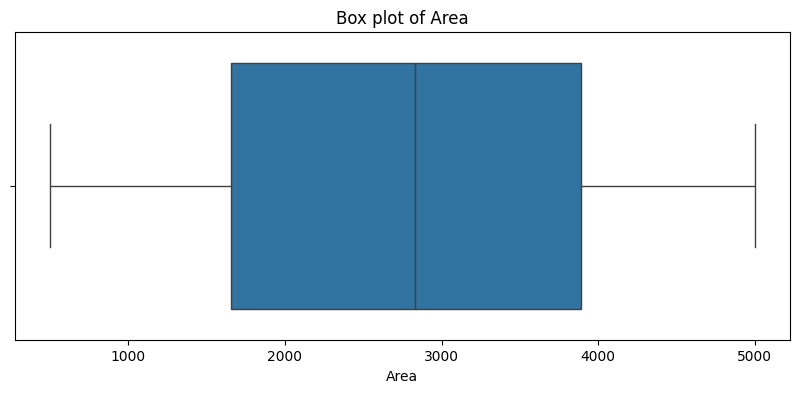

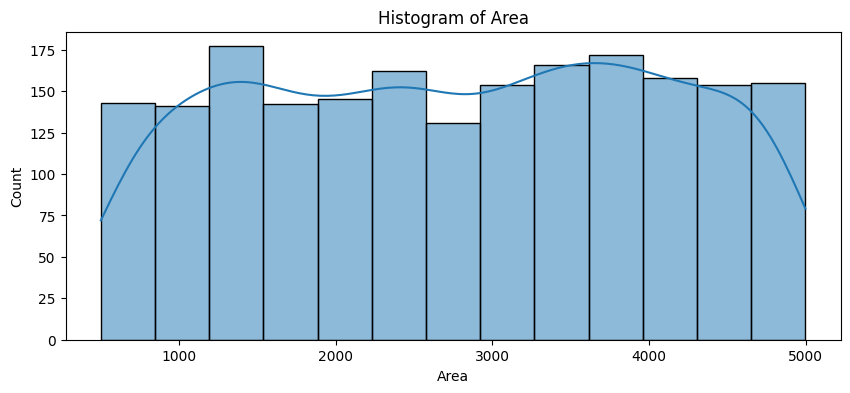

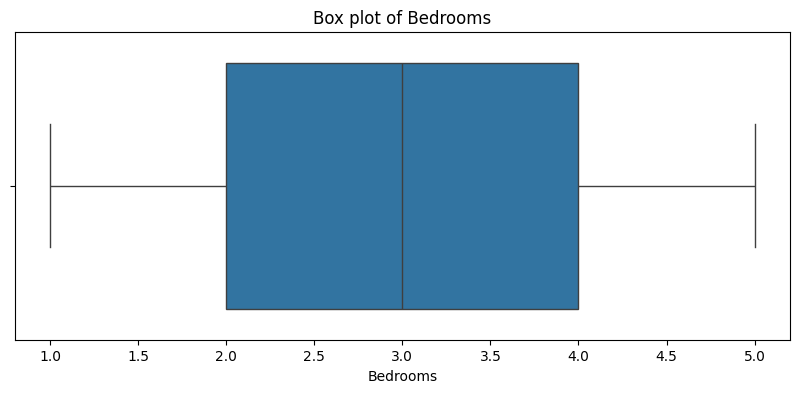

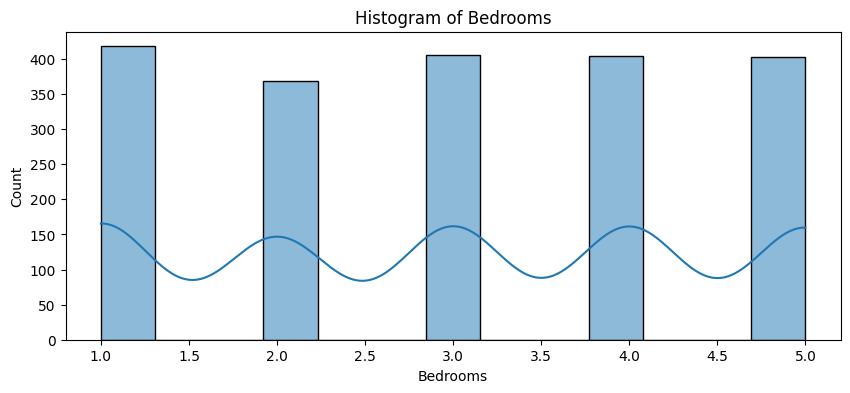

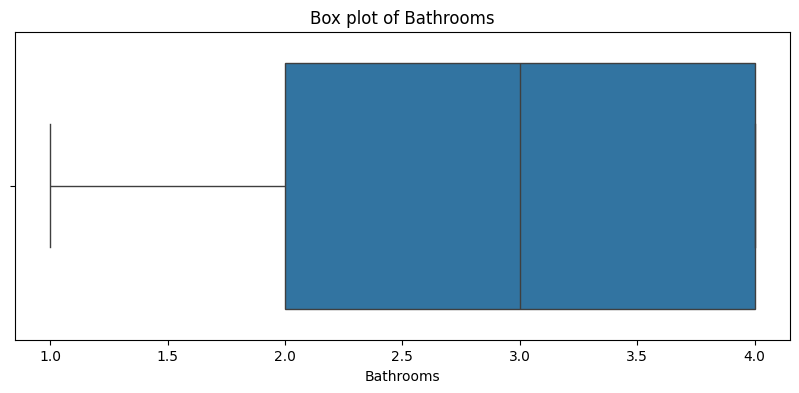

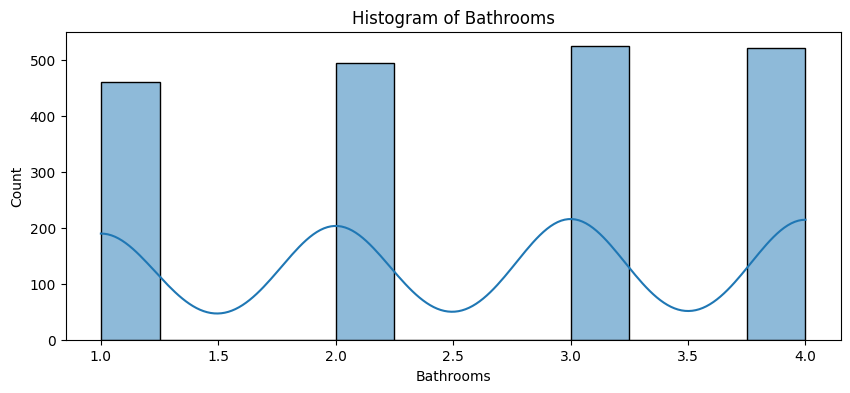

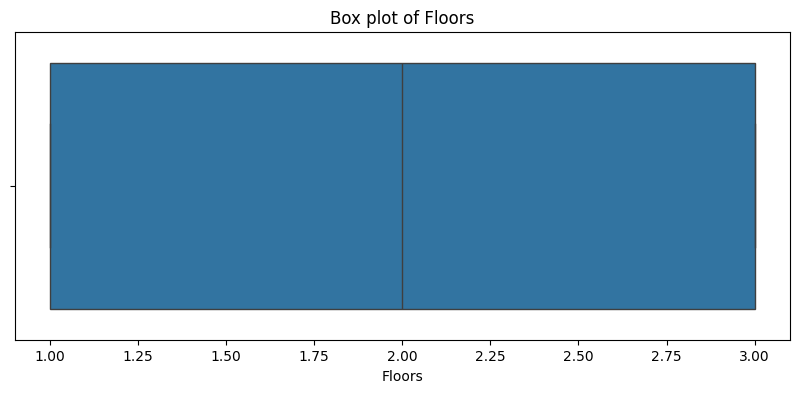

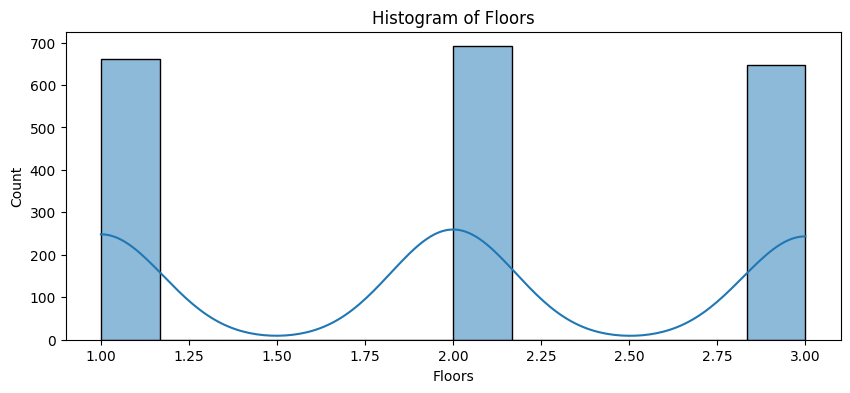

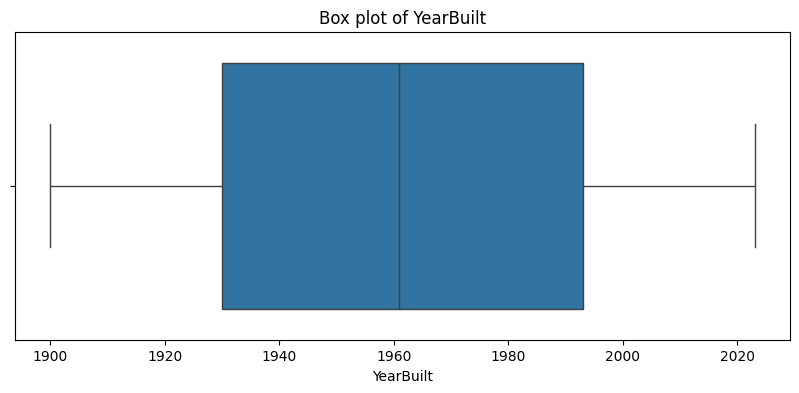

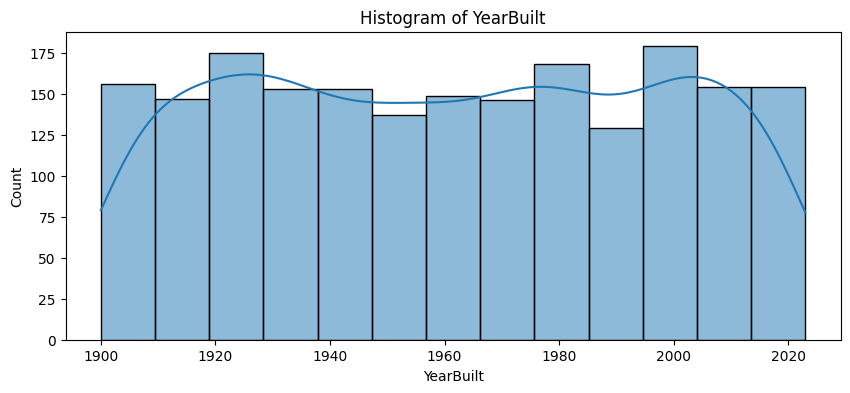

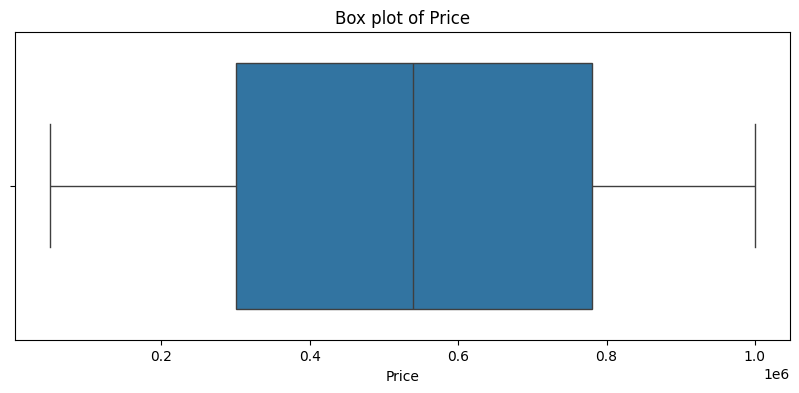

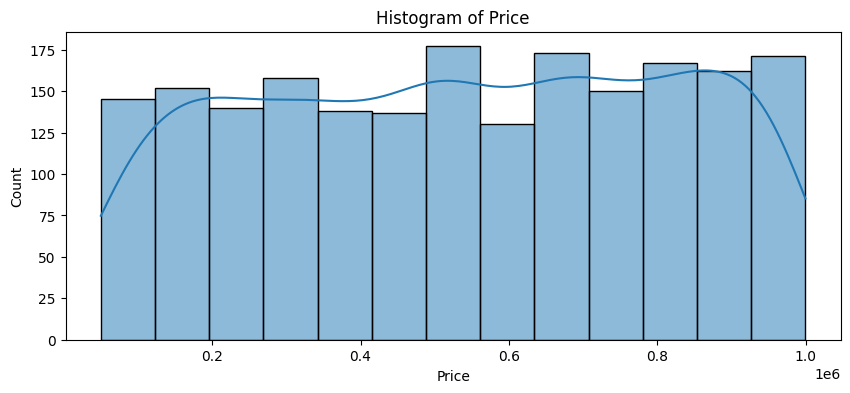

In [15]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numerical_cols)

for col in numerical_cols:
    if col != 'Id': # Exclude 'Id' as it's an identifier
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()

        plt.figure(figsize=(10, 4))
        sns.histplot(x=df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

## Handle categorical features

### Subtask:
Encode categorical variables into numerical format.


**Reasoning**:
Identify and encode categorical variables using one-hot encoding.



In [16]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

Categorical columns: ['Location', 'Condition', 'Garage']


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,1360,5,4,3,1970,149919,False,False,False,False,False,False,False
1,2,4272,5,4,3,1958,424998,False,False,False,False,False,False,False
2,3,3592,2,2,3,1938,266746,False,False,False,False,True,False,False
3,4,966,4,2,2,1902,244020,False,True,False,True,False,False,True
4,5,4926,1,4,2,1975,636056,False,False,False,True,False,False,True


## Check data types

### Subtask:
Ensure all columns have appropriate data types.


**Reasoning**:
Display the data types of all columns to inspect them and identify any that need conversion.



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Id                 2000 non-null   int64
 1   Area               2000 non-null   int64
 2   Bedrooms           2000 non-null   int64
 3   Bathrooms          2000 non-null   int64
 4   Floors             2000 non-null   int64
 5   YearBuilt          2000 non-null   int64
 6   Price              2000 non-null   int64
 7   Location_Rural     2000 non-null   bool 
 8   Location_Suburban  2000 non-null   bool 
 9   Location_Urban     2000 non-null   bool 
 10  Condition_Fair     2000 non-null   bool 
 11  Condition_Good     2000 non-null   bool 
 12  Condition_Poor     2000 non-null   bool 
 13  Garage_Yes         2000 non-null   bool 
dtypes: bool(7), int64(7)
memory usage: 123.2 KB


## Remove irrelevant columns

### Subtask:
Drop any columns that are not useful for the prediction task.


**Reasoning**:
Drop the 'Id' column as it is not useful for prediction and display the head of the modified dataframe.



In [18]:
df = df.drop('Id', axis=1)
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1360,5,4,3,1970,149919,False,False,False,False,False,False,False
1,4272,5,4,3,1958,424998,False,False,False,False,False,False,False
2,3592,2,2,3,1938,266746,False,False,False,False,True,False,False
3,966,4,2,2,1902,244020,False,True,False,True,False,False,True
4,4926,1,4,2,1975,636056,False,False,False,True,False,False,True


# Standardization and Normalization

**Reasoning**:
Select numerical columns excluding the target variable 'Price'.



In [19]:
numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('Price')
print("Numerical columns for scaling:", numerical_cols_for_scaling)

Numerical columns for scaling: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']


## Apply standardization (z-score scaling)

### Subtask:
Standardize the numerical features to have a mean of 0 and a standard deviation of 1.


**Reasoning**:
Standardize the numerical features using StandardScaler.



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,-1.101471,1.401791,1.305568,1.244151,0.238155,149919,False,False,False,False,False,False,False
1,1.147485,1.401791,1.305568,1.244151,-0.095942,424998,False,False,False,False,False,False,False
2,0.622317,-0.704581,-0.498326,1.244151,-0.652770,266746,False,False,False,False,True,False,False
3,-1.405759,0.699667,-0.498326,0.008035,-1.655061,244020,False,True,False,True,False,False,True
4,1.652574,-1.406705,1.305568,0.008035,0.377363,636056,False,False,False,True,False,False,True


## Apply normalization (min-max scaling)

### Subtask:
Normalize the numerical features to a specific range, typically between 0 and 1.


**Reasoning**:
Normalize the numerical features using MinMaxScaler.



In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,0.190974,1.00,1.000000,1.0,0.569106,149919,False,False,False,False,False,False,False
1,0.838373,1.00,1.000000,1.0,0.471545,424998,False,False,False,False,False,False,False
2,0.687194,0.25,0.333333,1.0,0.308943,266746,False,False,False,False,True,False,False
3,0.103379,0.75,0.333333,0.5,0.016260,244020,False,True,False,True,False,False,True
4,0.983771,0.00,1.000000,0.5,0.609756,636056,False,False,False,True,False,False,True


## Combine processed features

### Subtask:
Combine the standardized or normalized numerical features with the already processed categorical features.


**Reasoning**:
Verify that the categorical and numerical features are present in the dataframe after previous processing steps.



In [22]:
print("Columns after processing:", df.columns.tolist())
print("First 5 rows of the dataframe:")
display(df.head())

Columns after processing: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price', 'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Condition_Fair', 'Condition_Good', 'Condition_Poor', 'Garage_Yes']
First 5 rows of the dataframe:


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,0.190974,1.00,1.000000,1.0,0.569106,149919,False,False,False,False,False,False,False
1,0.838373,1.00,1.000000,1.0,0.471545,424998,False,False,False,False,False,False,False
2,0.687194,0.25,0.333333,1.0,0.308943,266746,False,False,False,False,True,False,False
3,0.103379,0.75,0.333333,0.5,0.016260,244020,False,True,False,True,False,False,True
4,0.983771,0.00,1.000000,0.5,0.609756,636056,False,False,False,True,False,False,True


# Training Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


# Evaluation

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 279859.72583784326
Mean Absolute Error (MAE): 243241.97758826384


* THANKS!!